# Mini-Batch K-Means

1. Wygeneruj losową próbkę danych przy użyciu funkcji `sklearn.datasets.make_blobs`, w dalszych testach użyj tej funkcji kilkukrotnie, aby wygenerować kilka różnych przykładów.

2. Pogrupuj te dane przy użyciu klasycznego algorytmu K-Means z [tej strony](https://github.com/IS-UMK/datamining_tutorial/blob/master/kmeans.ipynb).

3. Zaimplementuj naiwną funkcje Mini-Batch K-Means. Naiwna oznacza odpalenie zwykłego K-Means na podzbiorach i sumowanie najbliższych.

4. Zaimplementuj funkcje Mini-Batch K-Means z _listingu_ poniżej, pochodzi z [tej pracy](https://dl.acm.org/doi/pdf/10.1145/1772690.1772862). Funkcja `f` opisana jest właśnie w tej pracy.

5. Porównaj czasy wykonania  wszystkich trzech metod, jak szybko zbiega współczynnik _inertia_ ? _Inertia_ lub wewnątrz grupowa suma kwadratów, jest to kryterium, które optymalizuje K-Means.

![Wzór](images/Wzór.png)

![Algorytm](images/Algorytm.png)

In [395]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Ilość centroidów:
k=5;

# Ilość cech:
features=50;

# Wymiary box'a dla wartości:
box_x = -10.0;
box_y = 10.0;

# Wylosowanie próbek:
#   x - wygenerowane próbki (wymiar: n_samples x n_features),
#   y - etykiety przynależności do danej klasy wybranej próbki.
x, y = make_blobs(n_samples=1000, n_features=features, centers=k, center_box=(box_x, box_y), random_state=0);

In [396]:
def K_Means(x, k, max_iters = 100, min_improvement=0.01):
    prev_dist = 0;
    
    while True:
        C = np.random.uniform(low=box_x, high=box_y, size=(k, features));
        dists = distance.cdist(x, C, metric='euclidean');
        s2id = np.argmin(dists, axis=1);
        if len(np.unique(s2id)) == k:
            break;
    
    for y in range(max_iters):
        dists = distance.cdist(x, C, metric='euclidean'); # XA must be a 2-dimensional array.
        s2id = np.argmin(dists, axis=1) ;
        curr_dist = np.mean(np.min(dists, axis=1));
    
        for i in range(len(C)):
            C[i] = np.mean(x[s2id==i], axis=0);
        
        if curr_dist - prev_dist < min_improvement:
            break;

    return s2id, C;

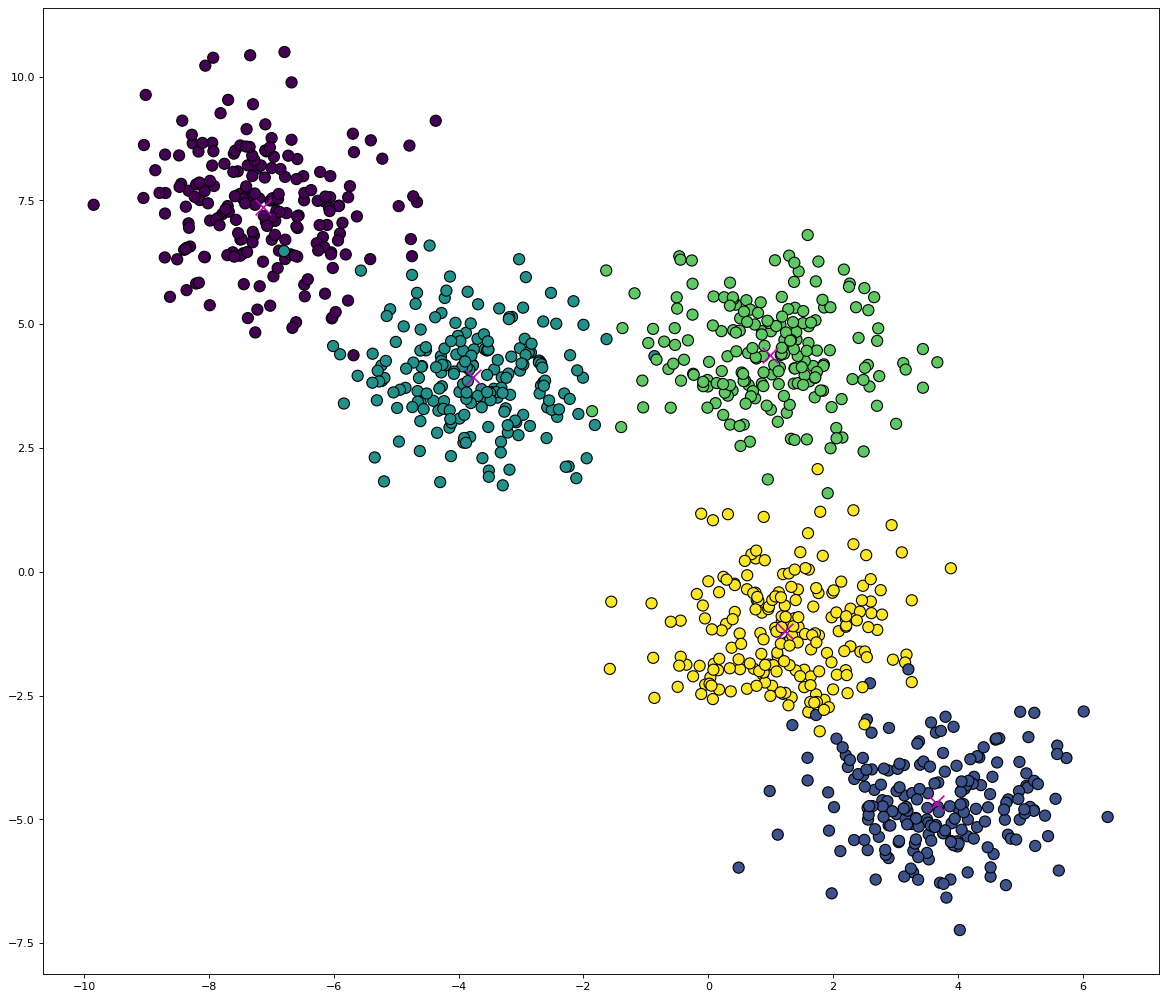

In [397]:
# Wykorzystanie K-Means:
s2id, C = K_Means(x,k);

# Konfiguracja rozmiaru wykresu:
plt.figure(figsize=(18, 16), dpi=80);

# Wyrysowanie próbek wraz z centrami:
plt.scatter(x[:, 0], x[:, 1], marker='o', s=100, c = s2id, edgecolor='k');
plt.scatter(C.T[0], C.T[1], s=200, marker='x', c='m');